In [1]:
import pandas as pd
import numpy as np
from selenium.webdriver import Chrome, ChromeOptions
from selenium.webdriver.common.keys import Keys
from time import sleep
import timeit
import csv
import logging

In [2]:
logger = logging.getLogger()
logger.disabled = False

In [3]:
browser = Chrome(executable_path=r"D:\Learning\web_driveres\chrome\chromedriver.exe")
# sleep(2)
browser.get('https://www.bseindia.com/')

## Read the data from CSV

The csv file should have data in below format

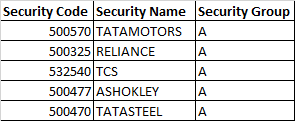


In [15]:
stock_list = pd.read_csv('bse_list.csv')

# The function to derive the scrapping data
* It will take input the BSE Code

In [36]:
def derive_industry(code):
    search_box = browser.find_element_by_xpath('//*[@id="getquotesearch"]')
    search_box.clear()
    search_box.send_keys(code)
    sleep(1)
    search_box.send_keys(Keys.SPACE)
    sleep(1)
    search_box.send_keys(Keys.BACKSPACE)
    sleep(1)
    search_box.send_keys(Keys.RETURN)
    cnt = 0
    industry_val = ''
    index_val = ''
    try:
        while cnt <= 4:
            industry = browser.find_element_by_xpath('//*[@id="getquoteheader"]/div[6]/div[3]/div/div[5]/div/table/tbody/tr[7]/td[1]')    
            if industry.text == 'Industry':
                derived_code = browser.find_element_by_xpath('//*[@id="getquoteheader"]/div[6]/div[2]/div/div[1]/div[1]/div[1]/div[2]/div/div[2]').text.split('|')[1].strip()
                if derived_code == code:
                    industry_val = browser.find_element_by_xpath('//*[@id="getquoteheader"]/div[6]/div[3]/div/div[5]/div/table/tbody/tr[7]/td[2]').text
                    index_val = browser.find_element_by_xpath('//*[@id="getquoteheader"]/div[6]/div[3]/div/div[5]/div/table/tbody/tr[5]/td[2]').text
                else:
#                     derive_industry(code)
                    industry_val = 'Scrapper derived wrong code here, so no value'
                    index_val = derived_code
                break
            cnt = cnt+1
            sleep(0.5)    
            logger.info(cnt)
    except:
        industry_val = ''
        index_val = ''
    return [industry_val,index_val]


## Loop through the data and invoke the function

In [23]:
stock_list_output = pd.DataFrame(columns=['Code','Name','Group','Industry','Index'])
# cnt = 0
starttime = timeit.default_timer()
for index, row in stock_list.iterrows():
#     cnt = cnt+1    
    func_res = derive_industry(str(row[0]))
    print(index,row[0],row[1],func_res)
    stock_list_output.loc[index+1] = [row[0],row[1],row[2]]+func_res
#     if cnt >4:
#         break
endtime = timeit.default_timer()
print(endtime-starttime)
# stock_list_output

0 500570 TATAMOTORS ['Commercial Vehicles', 'S&P BSE 100']
1 500325 RELIANCE ['Integrated Oil & Gas', 'S&P BSE SENSEX']
2 532540 TCS ['IT Consulting & Software', 'S&P BSE SENSEX']
3 500477 ASHOKLEY ['Scrapper derived wrong code here, so no value', '532540']
4 500470 TATASTEEL ['Iron & Steel/Interm.Products', 'S&P BSE 100']
5 532523 BIOCON ['Biotechnology', 'S&P BSE 100']
6 500034 BAJFINANCE ['Finance (including NBFCs)', 'S&P BSE SENSEX']
7 500182 HEROMOTOCO ['2/3 Wheelers', 'S&P BSE 100']
8 543066 SBICARD ['Finance (including NBFCs)', 'S&P BSE 200']
9 500180 HDFCBANK ['Banks', 'S&P BSE SENSEX']
10 500209 INFY ['IT Consulting & Software', 'S&P BSE SENSEX']
11 500875 ITC ['Cigarettes,Tobacco Products', 'S&P BSE SENSEX']
12 532921 ADANIPORTS ['Marine Port & Services', 'S&P BSE 100']
13 500800 TATACONSUM ['Tea & Coffee', 'S&P BSE 100']
14 532689 PVR ['Specialty Retail', 'S&P BSE 500']
15 539448 INDIGO ['Scrapper derived wrong code here, so no value', '532689']
16 531213 MANAPPURAM ['Financ

### Result Output to CSV

In [24]:
stock_list_output.to_csv('bse_result.csv', encoding='utf-8', index=False)

,Code,Name,Group,Industry,Index
1,500570,TATAMOTORS,A,Commercial Vehicles,S&P BSE 100
2,500325,RELIANCE,A,Integrated Oil & Gas,S&P BSE SENSEX
3,532540,TCS,A,IT Consulting & Software,S&P BSE SENSEX
4,500477,ASHOKLEY,A,"Scrapper derived wrong code here, so no value",532540
5,500470,TATASTEEL,A,Iron & Steel/Interm.Products,S&P BSE 100
6,532523,BIOCON,A,Biotechnology,S&P BSE 100
7,500034,BAJFINANCE,A,Finance (including NBFCs),S&P BSE SENSEX
8,500182,HEROMOTOCO,A,2/3 Wheelers,S&P BSE 100
9,543066,SBICARD,A,Finance (including NBFCs),S&P BSE 200
10,500180,HDFCBANK,A,Banks,S&P BSE SENSEX


# Deriveation for a single code

In [37]:
print(derive_industry('539448'))

['Airlines', 'S&P BSE 100']
